# Combining Gridsearch With a Pipeline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso  # This import is not used in the script and should be removed. 

from sklearn.model_selection import GridSearchCV

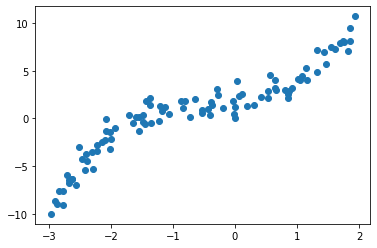

In [2]:
np.random.seed(42)
X = 5 * np.random.rand(100, 1) - 3
y = 0.6*X**3 + 0.6 * X**2 + 0.7*X + 2 + np.random.randn(100, 1)

plt.scatter(X, y)

In [3]:
X_new = np.linspace(-3, 2.5, 20).reshape(-1, 1)

## Creating a model with "arbitrarily" set hyperparameters

In [4]:
pipe = Pipeline(steps=[
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('regression', Ridge(alpha=1))
])

y_lr = pipe.fit(X, y)
y_lr_pred = y_lr.predict(X_new)

## Creating a model with hyperparameters chosen by GridSearch

In [5]:
# Checking what hyper-parameters we have and what they are called. Ex: "poly_features__degree" and "regression__alpha".
pipe.get_params()

{'memory': None,
 'steps': [('poly_features', PolynomialFeatures(include_bias=False)),
  ('regression', Ridge(alpha=1))],
 'verbose': False,
 'poly_features': PolynomialFeatures(include_bias=False),
 'regression': Ridge(alpha=1),
 'poly_features__degree': 2,
 'poly_features__include_bias': False,
 'poly_features__interaction_only': False,
 'poly_features__order': 'C',
 'regression__alpha': 1,
 'regression__copy_X': True,
 'regression__fit_intercept': True,
 'regression__max_iter': None,
 'regression__normalize': 'deprecated',
 'regression__positive': False,
 'regression__random_state': None,
 'regression__solver': 'auto',
 'regression__tol': 0.001}

In [6]:
param_grid = [
    {'poly_features__degree': [1, 2, 3, 4], 'regression__alpha': [0.5, 1, 1.5]}
]
grid_search = GridSearchCV(pipe, param_grid, cv = 3, scoring = 'neg_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('poly_features',
                                        PolynomialFeatures(include_bias=False)),
                                       ('regression', Ridge(alpha=1))]),
             param_grid=[{'poly_features__degree': [1, 2, 3, 4],
                          'regression__alpha': [0.5, 1, 1.5]}],
             scoring='neg_mean_squared_error')

In [7]:
grid_search.best_estimator_

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('regression', Ridge(alpha=1.5))])

In [8]:
y_best_pred = grid_search.predict(X_new)

# Plotting both models

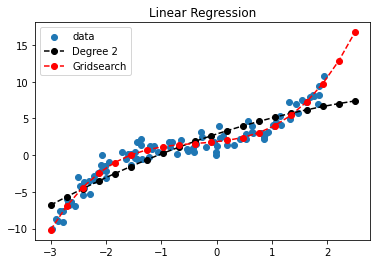

In [9]:
fig, ax = plt.subplots()
ax.set_title("Linear Regression")
ax.scatter(X, y, label = "data")
ax.plot(X_new, y_lr_pred, 'k--o', label = 'Degree 2')
ax.plot(X_new, y_best_pred, 'r--o', label = 'Gridsearch')
ax.legend()